In [9]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


In [10]:
train = pd.read_csv(r'D:\python\ImageClassfication\Multi_Label_dataset\train.csv')   
train.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7254 non-null   object
 1   Tags         7254 non-null   object
 2   Action       7254 non-null   int64 
 3   Adventure    7254 non-null   int64 
 4   Animation    7254 non-null   int64 
 5   Biography    7254 non-null   int64 
 6   Comedy       7254 non-null   int64 
 7   Crime        7254 non-null   int64 
 8   Documentary  7254 non-null   int64 
 9   Drama        7254 non-null   int64 
 10  Family       7254 non-null   int64 
 11  Fantasy      7254 non-null   int64 
 12  History      7254 non-null   int64 
 13  Horror       7254 non-null   int64 
 14  Music        7254 non-null   int64 
 15  Musical      7254 non-null   int64 
 16  Mystery      7254 non-null   int64 
 17  N/A          7254 non-null   int64 
 18  News         7254 non-null   int64 
 19  Reality-TV   7254 non-null 

In [11]:
train_image = []
for i in tqdm(range(2000)):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 2000/2000 [00:14<00:00, 136.08it/s]


In [12]:
y = np.array(train.drop(['Id', 'Tags'],axis=1))
y = y[0:2000, :]

In [13]:
X.shape

(2000, 400, 400, 3)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
#create the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 64)       

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
25/25 [==============================] - 201s 7s/step - loss: 0.6183 - accuracy: 0.1196 - val_loss: 0.4349 - val_accuracy: 0.1975
Epoch 2/20
25/25 [==============================] - 176s 7s/step - loss: 0.3900 - accuracy: 0.1662 - val_loss: 0.3529 - val_accuracy: 0.1975
Epoch 3/20
25/25 [==============================] - 174s 7s/step - loss: 0.3236 - accuracy: 0.2002 - val_loss: 0.2858 - val_accuracy: 0.1975
Epoch 4/20
25/25 [==============================] - 176s 7s/step - loss: 0.3006 - accuracy: 0.2126 - val_loss: 0.2895 - val_accuracy: 0.1975
Epoch 5/20
25/25 [==============================] - 175s 7s/step - loss: 0.2911 - accuracy: 0.2066 - val_loss: 0.2655 - val_accuracy: 0.1975
Epoch 6/20
25/25 [==============================] - 173s 7s/step - loss: 0.2794 - accuracy: 0.2139 - val_loss: 0.2499 - val_accuracy: 0.1975
Epoch 7/20
25/25 [==============================] - 174s 7s/step - loss: 0.2730 - accuracy: 0.2288 - val_loss: 0.2498 - val_accuracy: 0.1975
Epoch 8/20
25

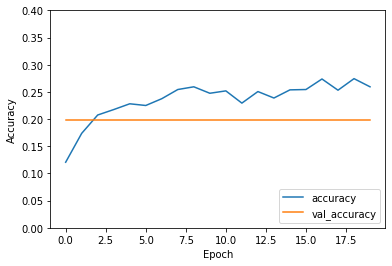

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.4])
plt.legend(loc='lower right')



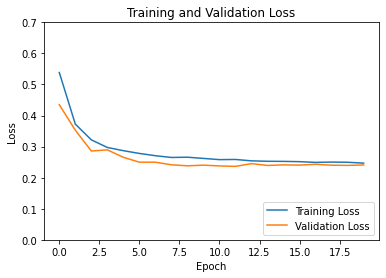

In [20]:

plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.7])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=10)
print(test_loss)
print(test_acc)

0.2408306747674942
0.19750000536441803


In [22]:
img = image.load_img('wanda-vision-vietsub.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Drama (0.54)
Comedy (0.32)
Action (0.26)
Crime (0.25)
Thriller (0.18)


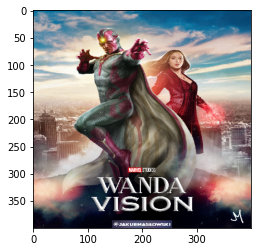

In [23]:

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_5 = np.argsort(proba[0])[:-6:-1]
for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.2})".format(proba[0][top_5[i]]))
plt.imshow(img)